In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

# Hierarchical Clustering

In [2]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Plot Dendrogram for Hierarchical Clustering

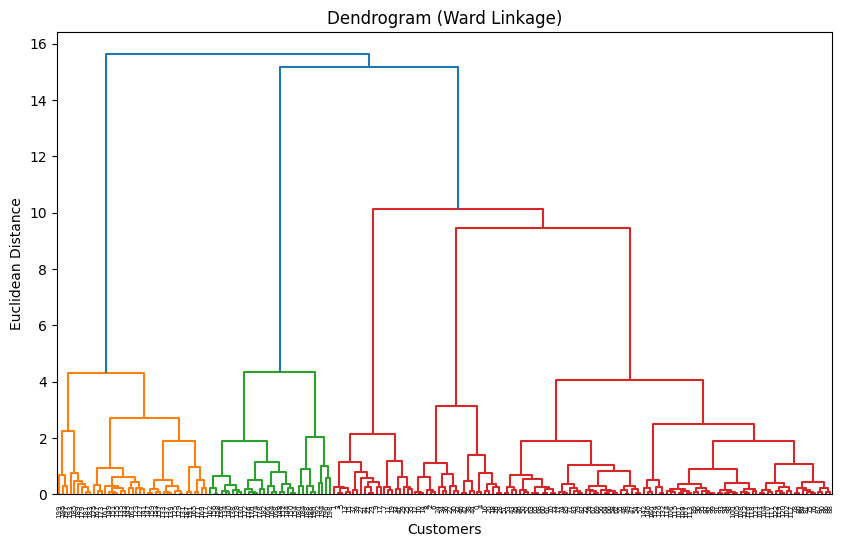

In [5]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [6]:
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

labels_hc = hc.fit_predict(X_scaled)


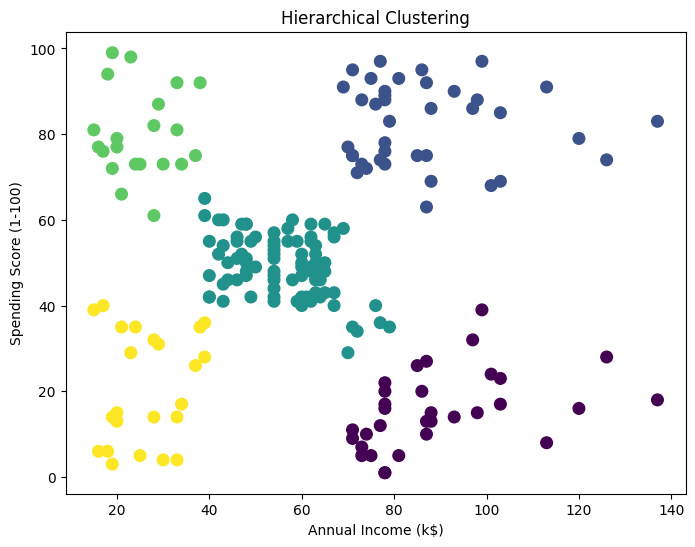

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels_hc,
    s=70
)

plt.title("Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


# DBSCAN Clustering

- eps = how close points must be to be considered neighbors
- min_samples = minimum points required to form a cluster
- Points labeled -1 are outliers

In [44]:
db = DBSCAN(eps=0.32, min_samples=5)
labels_db = db.fit_predict(X_scaled)

In [46]:
colors = ['black' if label == -1 else plt.cm.tab10(label / 10) for label in labels_db]

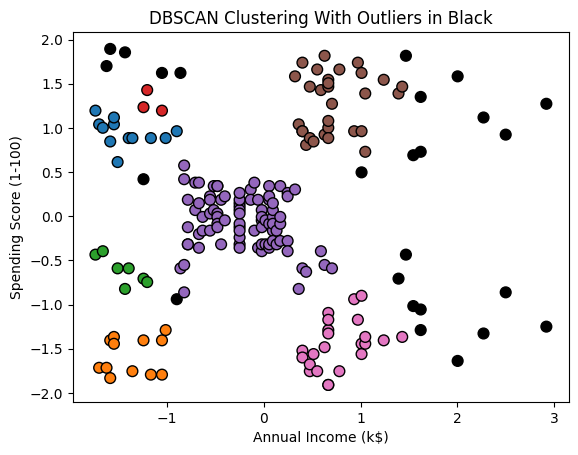

In [47]:
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=colors,
    s=60,
    edgecolor='k'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering With Outliers in Black")
plt.show()